# INET 4710 Project

Text Analysis of historical interaction data & content from removed facebook pages.

Author:

## 1. Overview

- what is the business problem?
	- (My problem: What is this data?, what is the tendency of data? Answer those question with document clustoring)
- Briefly describe the main objective of the project.
	- to clearfy the problem above
- List models created for project
	- k means,...
- Include relevant references

The data is from Facebook's user comment linked to 2016 US election investigation from following facebook pages.

- being_patriotic
- blacktivist
- lgbt_united
- secured_borders
- united_muslims_of_america


Data vizualization example: <https://public.tableau.com/profile/d1gi#!/vizhome/FB4/TotalReachbyPage>

----

## 2. Exploratory Data Analysis

In this section, I show following topics.

- numerical summary about all the data
- data structure of each dataframe
- effective data amount
- basic statistics about each columns of data
- word cloud to understand topic

In [36]:
# Loading data
from os import path
import pandas as pd

data_path = '/Users/reiven/Documents/Python/CSCI4710/Project/Data'
binary_path = '/Users/reiven/Documents/Python/CSCI4710/Project/binary_file'

blacktivist_data = pd.read_csv(path.join(data_path, 'blacktivist.csv'))
being_patriotic_data = pd.read_csv(path.join(data_path, 'being_patriotic.csv'))
# heart_of_texas_data = pd.read_csv(path.join(data_path, 'heart_of_texas.csv'))
lgbt_united_data = pd.read_csv(path.join(data_path, 'lgbt_united.csv'))
secured_borders_data = pd.read_csv(path.join(data_path, 'secured_borders.csv'))
united_muslims_of_america_data = pd.read_csv(path.join(data_path, 'united_muslims_of_america.csv'))
summary_stats = pd.read_csv(path.join(data_path, 'fb_removed_list_stats.csv'))


def show_basic_info(data, title):
    """
    Function to show exploratory data analysis 
    that shows following tooic.
    
    - shape(# of rows and columns)
    - data set column names and it's field definition(data type)
    - count of efficient(not Blank) data
    
    :param data: panda's dataframe
    :param title: string
    :return: 
    """
    sep = "\n" + "-" * 10 + "\n"
    print("Data:", title)
    print("Shape(row, column):", data.shape, sep)
    print("Column name and it's data type")
    print(data.info(), sep)
    print("Count of efficient(Not NA) data")
    print(data.count(), sep)
    print("Basic statistics of the data")
    print(data.describe(include='all'), sep)
    print("Show first 5 data")
    print(data.head(5))

### 2.1. Short summary of all the data

In [3]:
summary_stats

,source,page_url,page_status,total_shares,interactions,number_of_posts,word_count
0,Blacktivists,Facebook.com/Blacktivists,removed,103767792,6182835,500+,15349.0
1,Heart of Texas,Facebook.com/Txrebels,removed,102950151,3453143,500+,NaN
2,United Muslims of America,Facebook.Com/MuslimAmerica,removed,71355895,2128875,500+,6892.0
3,Being Patriotic,Facebook.Com/Patriototus,removed,51139860,4438745,500+,53782.0
4,Secured Borders,Facebook.Com/Secured.Borders,removed,5600136,1592771,500+,53850.0
5,LGBT United,Facebook.Com/Lgtbun,removed,5187494,1262386,500+,15020.0


The result above shows that the there are 6 resources from facebook page, and all the page is removed. 

The top 2 pages(Blacktivists and Heart of Texas) has huge total shares compared to other topics, 
but the word count(it related to the amount of comment) is not so obviously huge.
I assume people have much interesting to these 2 topics or the pages were created much older than the other pages.

But, heart of texas data does not have actual comment text, so I omit in this project.

### 2.2 Basic statistics for each page data

#### 2.2.1 Basic statistics about Blactivist page

In [4]:
show_basic_info(blacktivist_data, "Blactivist")

Data: Blactivist
Shape(row, column): (500, 10) 
----------

Column name and it's data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
page_url        500 non-null object
source          500 non-null object
followers       500 non-null int64
date            500 non-null object
time            500 non-null object
time_zone       500 non-null object
post_type       500 non-null object
interactions    500 non-null int64
post_message    498 non-null object
post_link       500 non-null object
dtypes: int64(2), object(8)
memory usage: 39.1+ KB
None 
----------

Count of efficient(Not NA) data
page_url        500
source          500
followers       500
date            500
time            500
time_zone       500
post_type       500
interactions    500
post_message    498
post_link       500
dtype: int64 
----------

Basic statistics of the data
                         page_url       source     followers        date  \
count         

#### 2.2.2 Basic statistics about Being patriotic page

In [5]:
show_basic_info(being_patriotic_data, "being patriotic")

Data: being patriotic
Shape(row, column): (500, 10) 
----------

Column name and it's data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
page_url        500 non-null object
source          500 non-null object
followers       500 non-null int64
date            500 non-null object
time            500 non-null object
post_type       500 non-null object
interactions    500 non-null int64
post_message    496 non-null object
post_link       500 non-null object
time_zone       500 non-null object
dtypes: int64(2), object(8)
memory usage: 39.1+ KB
None 
----------

Count of efficient(Not NA) data
page_url        500
source          500
followers       500
date            500
time            500
post_type       500
interactions    500
post_message    496
post_link       500
time_zone       500
dtype: int64 
----------

Basic statistics of the data
                        page_url           source      followers        date  \
count

#### 2.2.3 Basic statistics about LGBT united page

In [7]:
show_basic_info(lgbt_united_data, "lgbt united")

Data: lgbt united
Shape(row, column): (500, 10) 
----------

Column name and it's data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
page_url        500 non-null object
source          500 non-null object
followers       500 non-null int64
date            500 non-null object
time            500 non-null object
post_type       500 non-null object
interactions    500 non-null int64
post_message    500 non-null object
post_link       500 non-null object
time_zone       500 non-null object
dtypes: int64(2), object(8)
memory usage: 39.1+ KB
None 
----------

Count of efficient(Not NA) data
page_url        500
source          500
followers       500
date            500
time            500
post_type       500
interactions    500
post_message    500
post_link       500
time_zone       500
dtype: int64 
----------

Basic statistics of the data
                   page_url       source      followers        date      time  \
count   

#### 2.2.4 Basic statistics about Secured Borders page

In [9]:
show_basic_info(secured_borders_data, "secured borders")

Data: secured borders
Shape(row, column): (500, 10) 
----------

Column name and it's data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
page_url        500 non-null object
source          500 non-null object
followers       500 non-null int64
date            500 non-null object
time            500 non-null object
post_type       500 non-null object
interactions    500 non-null int64
post_message    500 non-null object
post_link       500 non-null object
time_zone       500 non-null object
dtypes: int64(2), object(8)
memory usage: 39.1+ KB
None 
----------

Count of efficient(Not NA) data
page_url        500
source          500
followers       500
date            500
time            500
post_type       500
interactions    500
post_message    500
post_link       500
time_zone       500
dtype: int64 
----------

Basic statistics of the data
                            page_url           source      followers  \
count        

#### 2.2.5 Basic statistics about United Muslims of America page

In [10]:
show_basic_info(united_muslims_of_america_data, "united muslims of america")

Data: united muslims of america
Shape(row, column): (500, 10) 
----------

Column name and it's data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
page_url        500 non-null object
source          500 non-null object
followers       500 non-null int64
date            500 non-null object
time            500 non-null object
post_type       500 non-null object
interactions    500 non-null int64
post_message    500 non-null object
post_link       500 non-null object
time_zone       500 non-null object
dtypes: int64(2), object(8)
memory usage: 39.1+ KB
None 
----------

Count of efficient(Not NA) data
page_url        500
source          500
followers       500
date            500
time            500
post_type       500
interactions    500
post_message    500
post_link       500
time_zone       500
dtype: int64 
----------

Basic statistics of the data
                          page_url                     source      follower

### 2.2.6 Word Cloud

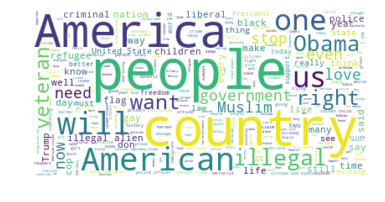

In [46]:
# wordcloud
from wordcloud import WordCloud

text = ','.join(data['post_message'])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", max_words=1000).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt


# lower max_font_size

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()

----

## 3. Data formatting

In this section, formatting time data and text data. 

First, removing rows which has NA column to clean dataset. Also, I drop page_url, source, post_link columns from all the dataframes. The page_url and source columns are almost same values in a certain dataframes, and the post_link columns is just a identification of each row. So, I omit those data. Instead of page_url, I add page_label column which is text label for each dataframe.

Second, as the result of exploratory data analysis shows, each dataframe has date, time, and time_zone column which is text data. I format these data to datetime object.

Then, I merge all the dataframe as one dataframe.

Also, all the data frames have post_message column, which is actual comment text by the user.
I format these data to tf-idf matrix style.

In [37]:
def clean_pd(df, page_label):
    """
    function to clean dataframes.
    this function drop rows which contains NA, 
    and drop page_url, source, post_link column
    :param df: 
    :return df: 
    """
    show = True
    past_shape = df.shape
    df = df.dropna(axis=0, how='any')
    df = df.drop(['page_url', 'source', 'post_link'], axis=1)
    df['page_label'] = page_label
    df = df.reset_index()  # reset index for datetime append operation
    if show:
        print('shape compare: ', past_shape, df.shape)
    return df

blacktivist_data = clean_pd(blacktivist_data, 'blacktivist')
being_patriotic_data = clean_pd(being_patriotic_data, 'being_patriotic')
lgbt_united_data = clean_pd(lgbt_united_data, 'lgbt_united')
secured_borders_data = clean_pd(secured_borders_data, 'secured_borders')
united_muslims_of_america_data = clean_pd(united_muslims_of_america_data, 'united_muslims')

shape compare:  (500, 10) (498, 9)
shape compare:  (500, 10) (496, 9)
shape compare:  (500, 10) (500, 9)
shape compare:  (500, 10) (500, 9)
shape compare:  (500, 10) (500, 9)


In [38]:
from datetime import datetime


def parse_pd_datetime(df):
    """
    function to create datetime column which data is datetime object from date, time and time_zone column.
    After that, remove date, time, time_zone column.
    
    :param df: 
    :return df: 
    """
    datetime_list = list()
    for i in range(df.shape[0]):
        # need correct numerical index for code below.
        dt_str = '%s %s %s' % (df['date'][i], df['time'][i], df['time_zone'][i])
        dt_str = dt_str.strip()  # need strip to remove last blank character.
        try:
            dt_parsed = datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S %Z%z')
        except ValueError as e:
            print(e)
            print('error happen :%s;' % dt_str)
            dt_parsed = None
        datetime_list.append(dt_parsed)
    
    df['datetime'] = datetime_list
    df = df.drop(['index','date', 'time', 'time_zone'], axis=1)
    return df


blacktivist_data = parse_pd_datetime(blacktivist_data)
being_patriotic_data = parse_pd_datetime(being_patriotic_data)
lgbt_united_data = parse_pd_datetime(lgbt_united_data)
secured_borders_data = parse_pd_datetime(secured_borders_data)
united_muslims_of_america_data = parse_pd_datetime(united_muslims_of_america_data)

In [39]:
# merge all the data
data = pd.concat([blacktivist_data, being_patriotic_data, lgbt_united_data, secured_borders_data, united_muslims_of_america_data])
show_basic_info(data, 'all data')

Data: all data
Shape(row, column): (2494, 6) 
----------

Column name and it's data type
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2494 entries, 0 to 499
Data columns (total 6 columns):
followers       2494 non-null int64
post_type       2494 non-null object
interactions    2494 non-null int64
post_message    2494 non-null object
page_label      2494 non-null object
datetime        2494 non-null object
dtypes: int64(2), object(4)
memory usage: 136.4+ KB
None 
----------

Count of efficient(Not NA) data
followers       2494
post_type       2494
interactions    2494
post_message    2494
page_label      2494
datetime        2494
dtype: int64 
----------

Basic statistics of the data
           followers post_type   interactions  \
count   2.494000e+03      2494    2494.000000   
unique           NaN         1            NaN   
top              NaN  Facebook            NaN   
freq             NaN      2494            NaN   
mean    9.397965e+04       NaN    6253.224138   
std     1

In [ ]:
# make term document matrix


# TODO



3.1. clearfy task that I could do(clustering)

## TODO From now
2.4 tf-idf